In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data Analytics/dataset for assignment 2.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
# print(data.head())


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB
None


DATA CLEANING

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Verifying that no missing values are present
print(data.isnull().sum())


User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64
User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64


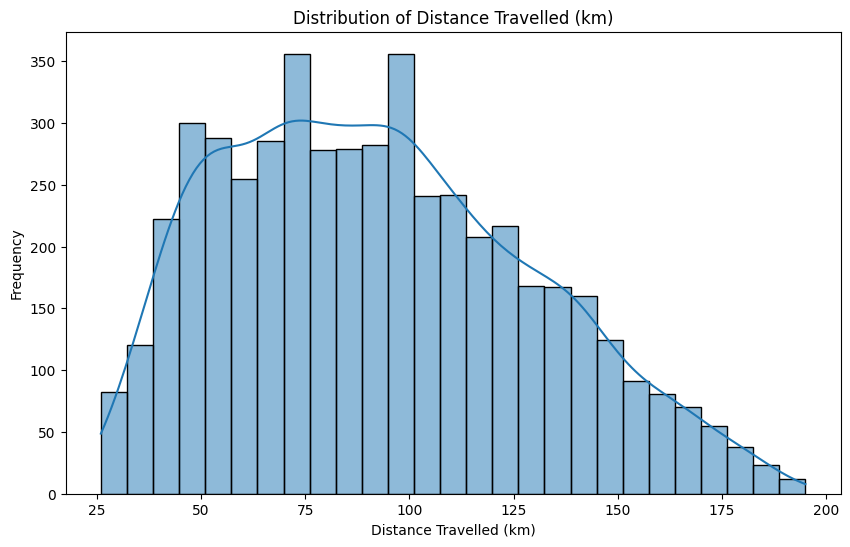

In [5]:
# Visualize the distribution of 'Distance Travelled (km)'
plt.figure(figsize=(10, 6))
sns.histplot(data['Distance Travelled (km)'], kde=True)
plt.title('Distribution of Distance Travelled (km)')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Frequency')
plt.show()

Exploratory Data Analysis (EDA)

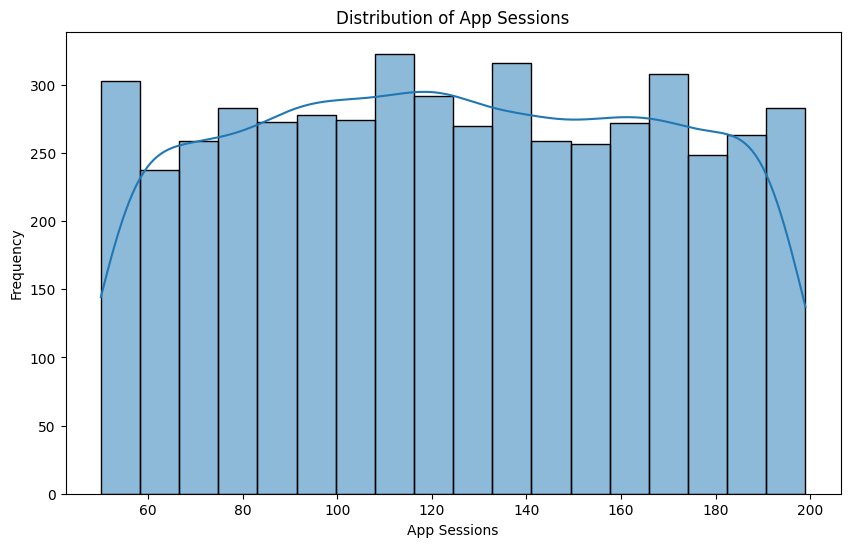

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'App Sessions'
plt.figure(figsize=(10, 6))
sns.histplot(data['App Sessions'], kde=True)
plt.title('Distribution of App Sessions')
plt.xlabel('App Sessions')
plt.ylabel('Frequency')
plt.show()



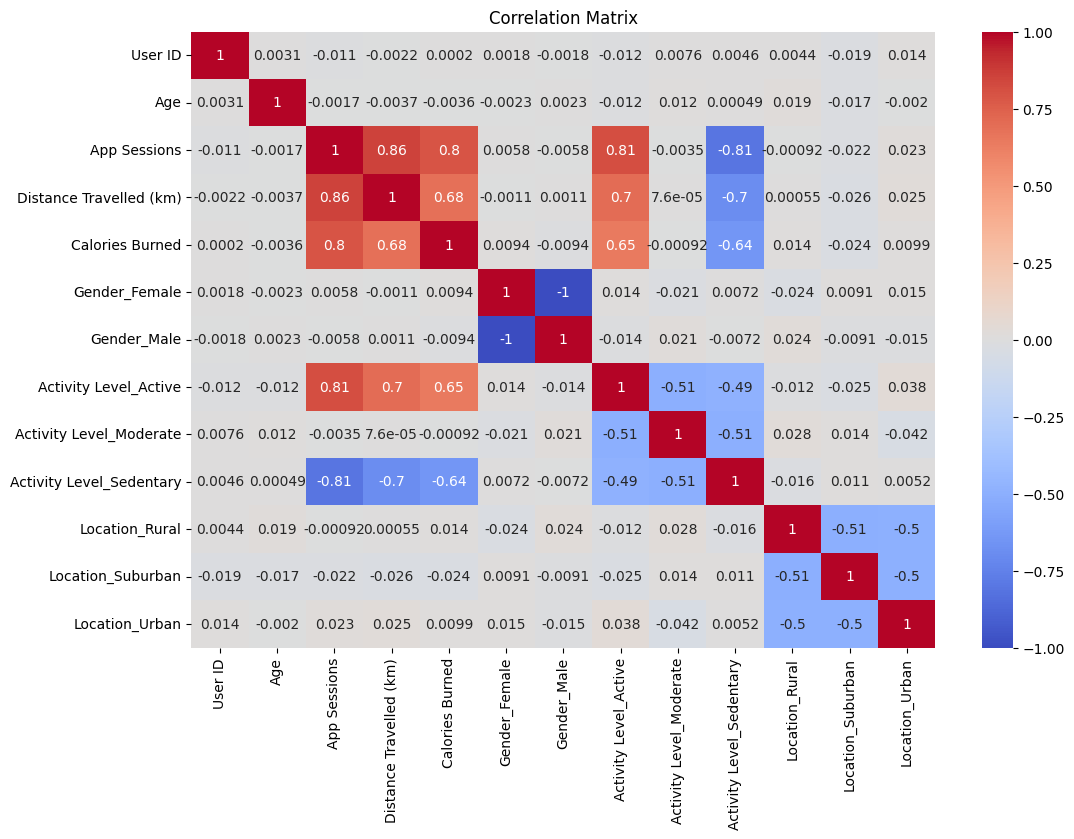

In [6]:
# Encode categorical variables for correlation analysis
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Selection and Engineering

In [7]:
# Select relevant features based on EDA
selected_features = ['App Sessions', 'Distance Travelled (km)', 'Calories Burned']

# feature engineering: adding interaction terms
data['Calories per Session'] = data['Calories Burned'] / data['App Sessions']

# Check the new feature
print(data[['App Sessions', 'Calories Burned', 'Calories per Session']].head())


   App Sessions  Calories Burned  Calories per Session
0           151              728              4.821192
1           157              523              3.331210
2           178              795              4.466292
3           155              715              4.612903
4            95              439              4.621053


MODEL DEVELOPMENT

REGRESSION I --> Linear Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define features and target variable
X = data[['Distance Travelled (km)', 'Calories Burned']]
y = data['App Sessions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display regression coefficients
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

print('Regression RMSE:', rmse)
print('Regression R2 Score:', r2)


                         Coefficient
Distance Travelled (km)     0.684077
Calories Burned             0.090410
Regression RMSE: 18.218188885923677
Regression R2 Score: 0.8216772761946146


REGRESSION II --> K Nearest Neighbor

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can change the number of neighbors
knn_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_regressor.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print('KNN RMSE:', rmse_knn)
print('KNN R2 Score:', r2_knn)


KNN RMSE: 17.85871327951709
KNN R2 Score: 0.8286450645692526


CLUSTERING I --> KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Silhouette Score: 0.5188716631539055


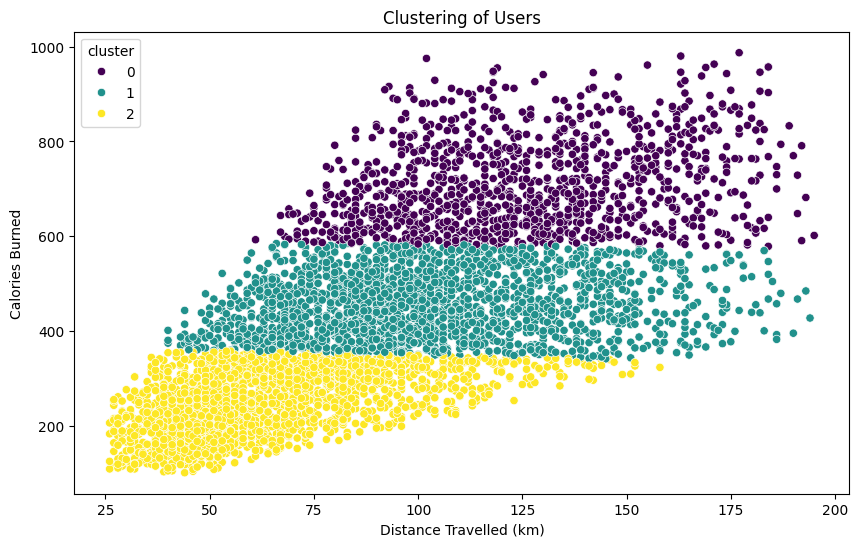

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# For simplicity, let's assume we're clustering based on 'Distance Travelled (km)' and 'Calories Burned'
X_clustering = data[['Distance Travelled (km)', 'Calories Burned']]

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_clustering)

# Evaluate clustering
silhouette_avg = silhouette_score(X_clustering, data['cluster'])
print('Clustering Silhouette Score:', silhouette_avg)

# Visualize clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Travelled (km)', y='Calories Burned', hue='cluster', data=data, palette='viridis')
plt.title('Clustering of Users')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.show()


CLUSTERING II -> Spectral Clustering

Spectral Clustering Silhouette Score: 0.4823196037451535


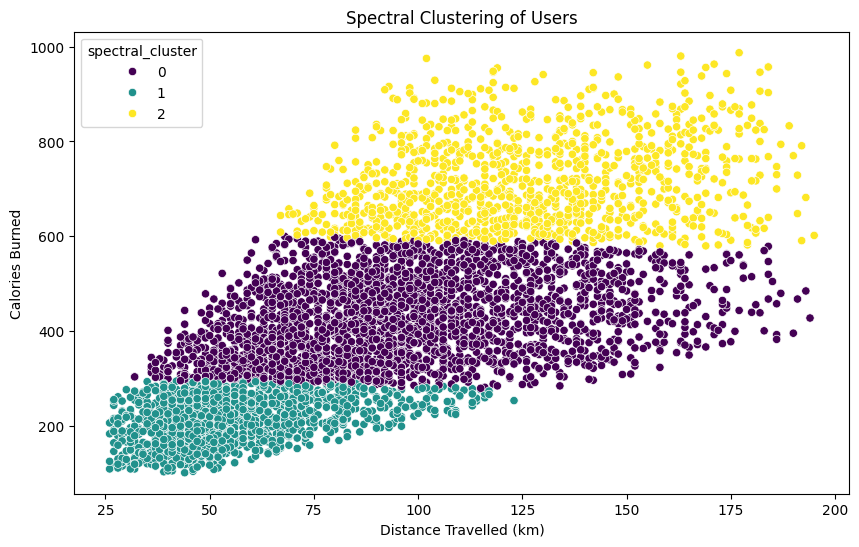

In [11]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['spectral_cluster'] = spectral.fit_predict(X_clustering)

# Evaluate clustering
silhouette_spectral = silhouette_score(X_clustering, data['spectral_cluster'])
print('Spectral Clustering Silhouette Score:', silhouette_spectral)

# Visualize clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Travelled (km)', y='Calories Burned', hue='spectral_cluster', data=data, palette='viridis')
plt.title('Spectral Clustering of Users')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.show()
